<a href="https://colab.research.google.com/github/Laura9704/2025_-Analisis/blob/main/TRABAJO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sns.set_theme(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


INTRODUCCION

El presente trabajo se enfoca en detallar los pasos del analisis univariado a la informacion de la base del 2021 BRFSS Dataset from CDC;es el Sistema de Vigilancia de Factores de Riesgo Conductual (BRFSS) el cual es el principal sistema de encuestas telefónicas relacionadas con la salud donde se recopila datos estatales sobre los residentes de EE. UU en base a estilos de vida y salud, esta base consta con 19 caracteristicas para analisis de las cuales 7 son numericas y 12 son categoricas.Por ello este análisis univariado, se busca explorar y comprender las características fundamentales del conjunto de datos, como es la distribución, la tendencia central, y los posibles patrones presentes en los datos antes de realizar análisis más complejos.

In [ ]:
#llamado de la informacion
data = pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')

Se prosigue a los siguientes pasos de analisis en los datos de la base llamada CVD_cleaned.csv, la cual consiste en reconocimiento del tamano de la informacion la cual consta de 19 columnas o etiquetas con 308854 registros, de los cuales hay informacion categorica y numerica.

a continuacion se anexa la informacion de las datos en la base

In [ ]:
print("Información del conjunto de datos:\n")
data.info()

Información del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(

Estadísticas descriptivas: Como se conoce hay dos tipos de varibles dentro de los datos, por lo cual se analisa las tendencias de estos a continuacion

En la primera tabla es para variables numericas nos indica por sus medias que existe un individuo tiene un promedio de altura de 170.6, un peso de 83.6, y un IMC de 25.6 que indica sobrepeso en base de las reglas del IMC/BMI que debe mayores iguales tiene tendencia a sobrepeso,con comsumos de frutas y vegetales alto, con bajo consumo de alcohol y papas fritas.

En cuestion de la STD o desviacion estandar hay una gran dispersion dentro de la mayoria de los datos, siendo el BMI/IMC es mas moderada y los cambios no son grandes, por lo cual los datos tienen a tener el mismo comportamiento que seria el sobrepeso en base a la media
en las variables categoricas nos indica que la mayoria de los individuos tiene una buena salud y que realizan un ejercio(algun deporte), que rondan las edades de los 65 a 69 años, la mayoria no fuman y son mujeres.

In [ ]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [ ]:
data.describe(include="object")

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


Analisis univariado de las variables numericas

Datos atipicos A partir de los gráficos, se observa que las variables numéricas presentan varios datos atípicos (outliers), principalmente en el extremo derecho. Esto indica la presencia de individuos con valores significativamente altos en ciertas mediciones. Sin embargo, en el caso de la altura, los outliers están presentes en ambos extremos, lo que sugiere la existencia de personas con estaturas tanto muy bajas como muy altas.

Variables Físicas:

Altura (Height cm):La distribución de la altura muestra la presencia de valores atípicos en ambos extremos, lo que refleja la existencia de individuos con estaturas significativamente diferentes del promedio. Aunque la caja del boxplot parece relativamente equilibrada, hay una mayor cantidad de valores atípicos en el extremo inferior, lo que sugiere que existen más personas con estaturas bajas que con estaturas extremadamente altas.

Peso (Weight kg): Los datos muestran un número significativo de outliers en el extremo superior, lo que indica la presencia de individuos con pesos considerablemente elevados. La distribución dentro de la caja no es completamente simétrica, ya que Q1 está más cerca de la mediana que Q3, sugiriendo un sesgo hacia la derecha. Aunque hay una concentración notable de valores en el rango de 70 a 100 kg, el peso presenta una mayor dispersión y valores extremos que superan ampliamente los 100 kg.

BMI (Índice de Masa Corporal)

El BMI presenta una distribución sesgada hacia la derecha, con una gran cantidad de valores atípicos en el extremo superior, lo que indica que hay personas con un índice de masa corporal considerablemente alto. En este caso, Q3 se encuentra más alejado de la mediana que Q1, lo que confirma la asimetría de la distribución. Además, se observa que los valores están concentrados en un rango cercano a los 28 BMI, lo que sugiere que una parte considerable de la muestra se encuentra en la categoría de sobrepeso u obesidad.


[ ]


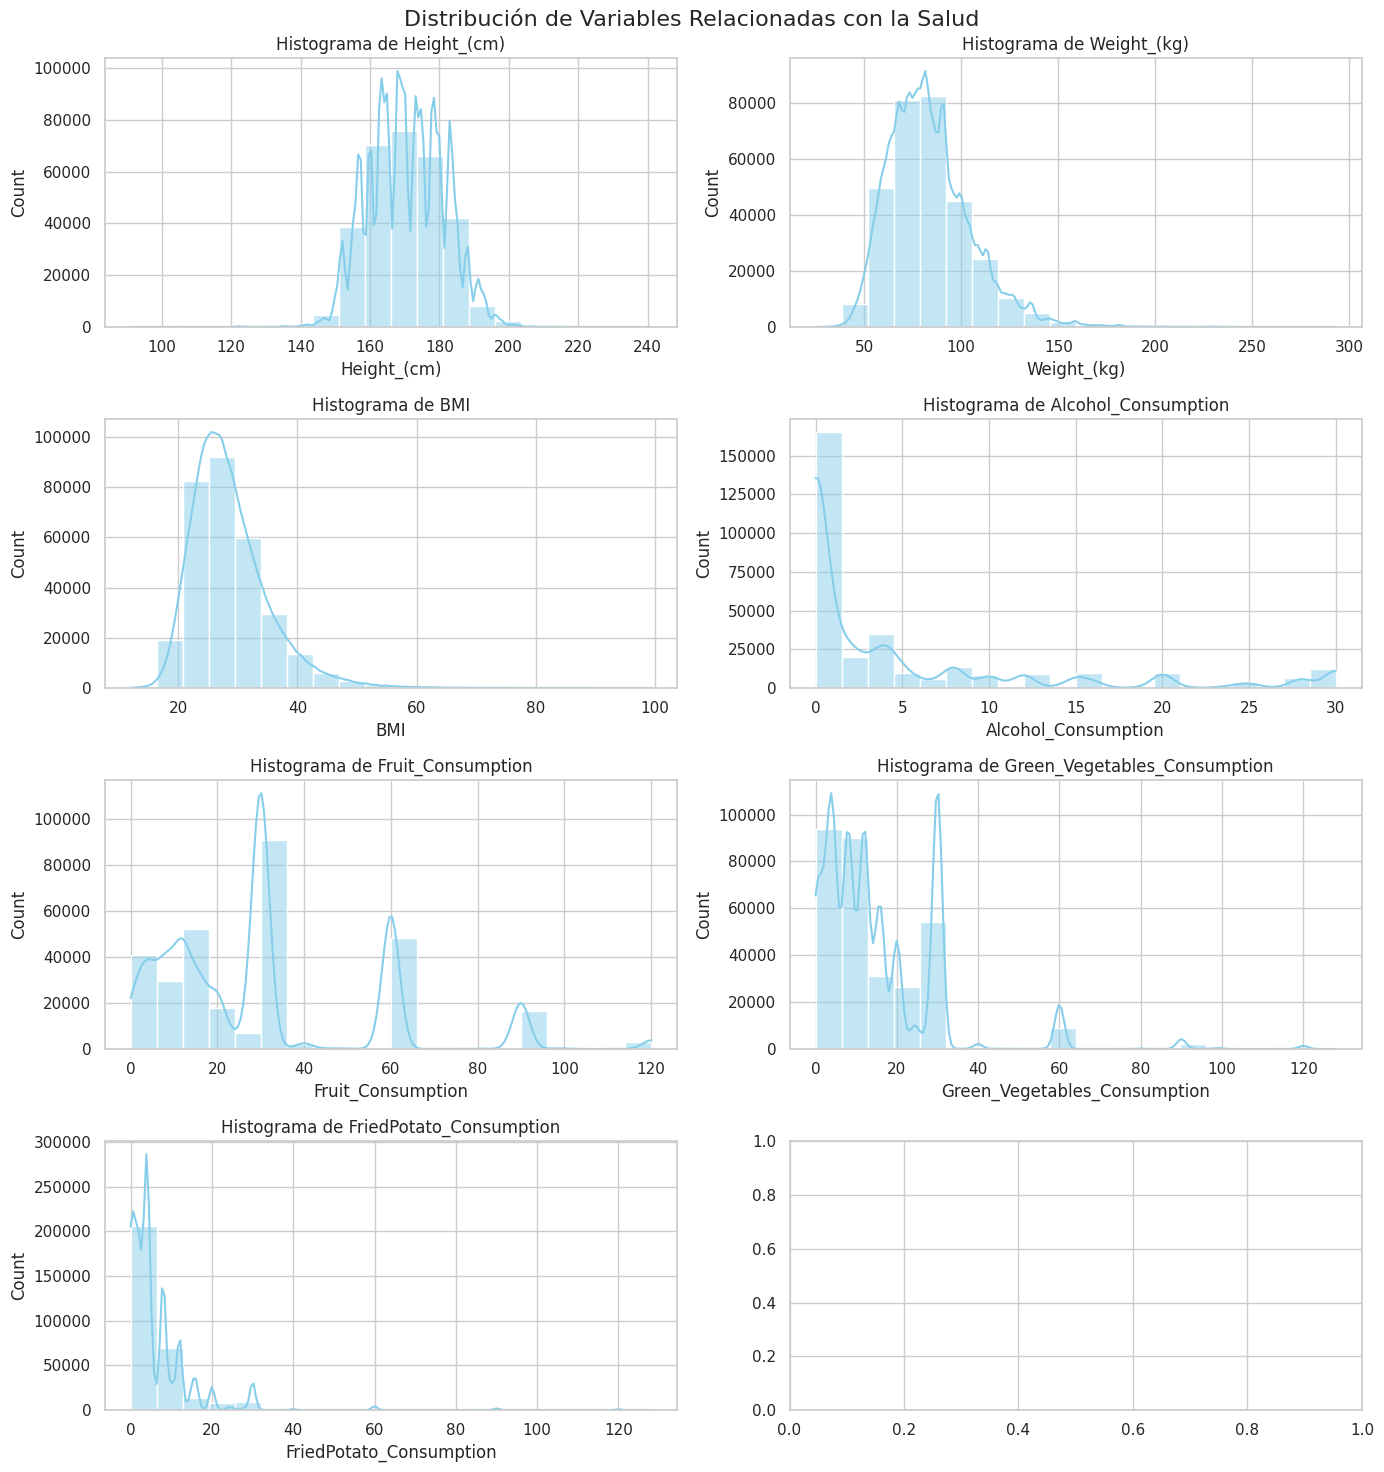

In [ ]:
#grafico
fig, axes = plt.subplots(4, 2, figsize=(14, 15))  # 2 filas, 2 columnas
fig.suptitle("Distribución de Variables Relacionadas con la Salud", fontsize=16)
sns.histplot(data['Height_(cm)'], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Histograma de Height_(cm)')
sns.histplot(data['Weight_(kg)'], bins=20, kde=True, ax=axes[0, 1], color="skyblue")
axes[0, 1].set_title('Histograma de Weight_(kg)')
sns.histplot(data['BMI'], bins=20, kde=True, ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title('Histograma de BMI')
sns.histplot(data['Alcohol_Consumption'], bins=20, kde=True, ax=axes[1, 1], color="skyblue")
axes[1, 1].set_title('Histograma de Alcohol_Consumption')
sns.histplot(data['Fruit_Consumption'], bins=20, kde=True, ax=axes[2, 0], color="skyblue")
axes[2, 0].set_title('Histograma de Fruit_Consumption')
sns.histplot(data['Green_Vegetables_Consumption'], bins=20, kde=True, ax=axes[2, 1], color="skyblue")
axes[2, 1].set_title('Histograma de Green_Vegetables_Consumption')
sns.histplot(data['FriedPotato_Consumption'], bins=20, kde=True, ax=axes[3, 0], color="skyblue")
axes[3, 0].set_title('Histograma de FriedPotato_Consumption')
plt.tight_layout()
plt.show()

Analsis Bivariado

El presente análisis bivariado tiene como objetivo examinar la relación entre la condición de salud general (General_Health) y la presencia de enfermedades cardíacas (Heart_Disease). La selección de estas variables se basa en la premisa de que la salud general puede influir significativamente en el riesgo de padecer enfermedades cardiovasculares. Comprender esta relación puede aportar información valiosa para la identificación de patrones de riesgo y la toma de decisiones en salud pública.

Para este análisis, se calcularán estadísticas descriptivas y de asociación que permitirán evaluar la relación entre ambas variables. A partir de estos resultados, se interpretarán las tendencias observadas y su posible impacto en el estudio de enfermedades cardíacas

Matriz de Correlación:


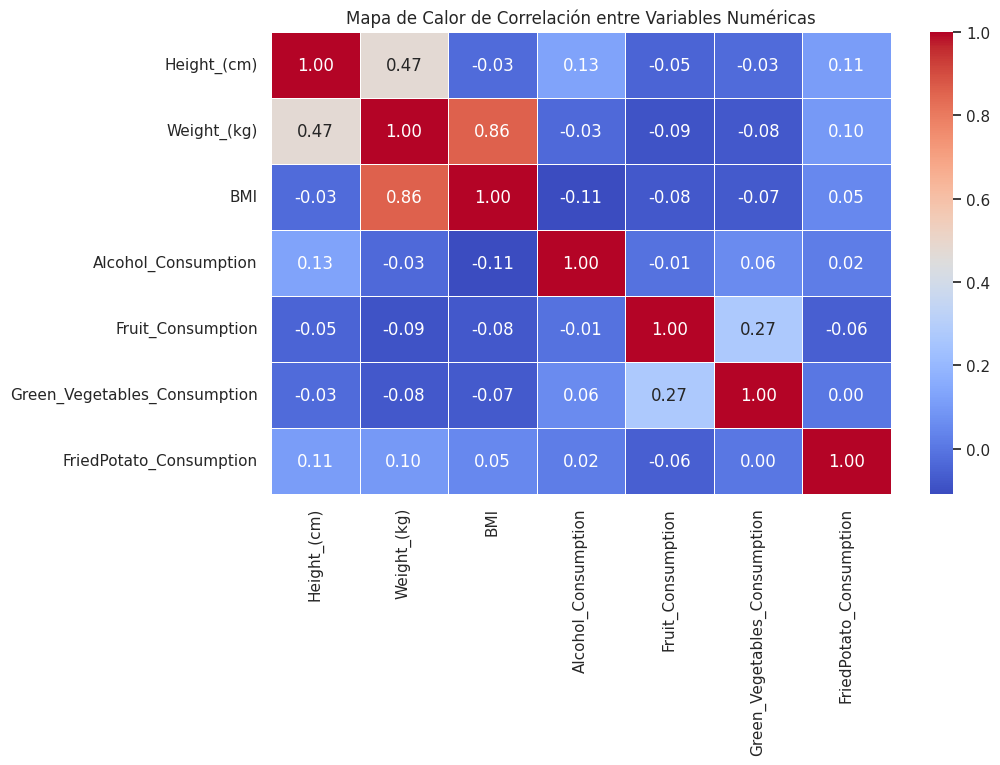

In [ ]:
# Seleccionar solo variables numéricas
numeric_vars = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_vars.corr(method='pearson')

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
#print(correlation_matrix)

# Graficar un heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor de Correlación entre Variables Numéricas")
plt.show()


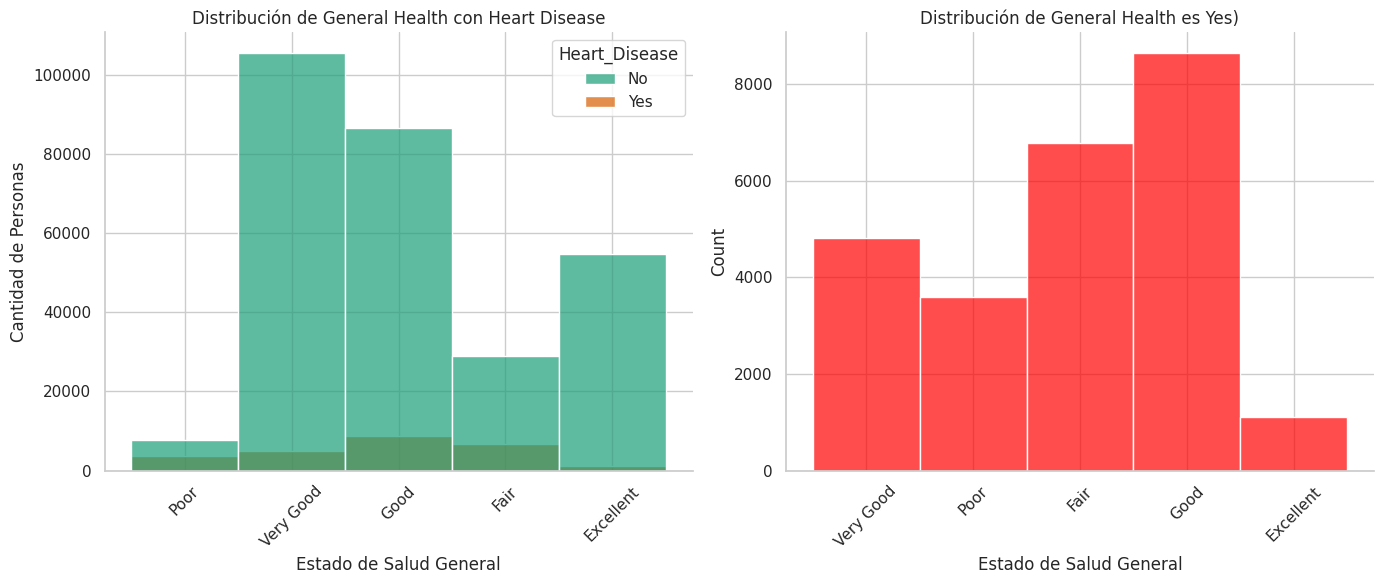

In [ ]:
df_seleccionado = data[['General_Health', 'Heart_Disease']]#datos filtrados
# Crear la figura con dos gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico: Distribución completa
sns.histplot(data=df_seleccionado, x="General_Health", hue="Heart_Disease", multiple="layer",
             palette="Dark2", alpha=0.7, ax=axes[0])
axes[0].set_title("Distribución de General Health con Heart Disease")
axes[0].set_xlabel("Estado de Salud General")
axes[0].set_ylabel("Cantidad de Personas")
axes[0].tick_params(axis='x', rotation=45)
axes[0].spines[['top', 'right']].set_visible(False)

# Segundo gráfico: Solo casos con Heart_Disease == "Yes"
sns.histplot(data=df_seleccionado[df_seleccionado["Heart_Disease"] == "Yes"],
             x="General_Health", color="red", alpha=0.7, bins=10, ax=axes[1])
axes[1].set_title("Distribución de General Health es Yes)")
axes[1].set_xlabel("Estado de Salud General")
axes[1].tick_params(axis='x', rotation=45)
axes[1].spines[['top', 'right']].set_visible(False)

# Ajustar diseño
plt.tight_layout()
plt.show()

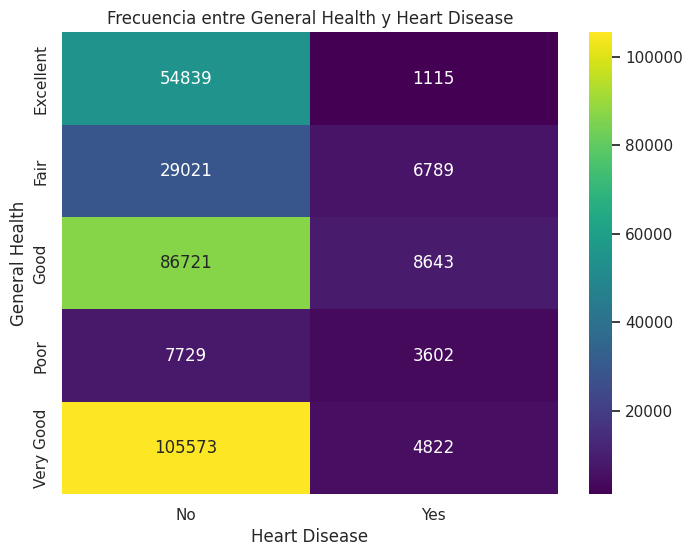

In [ ]:
cross_tab = pd.crosstab(df_seleccionado['General_Health'], df_seleccionado['Heart_Disease'])# Crear tabla de frecuencias cruzadas
plt.figure(figsize=(8, 6)) #tamaño de la imagen
sns.heatmap(cross_tab, annot=True, cmap="viridis", fmt="d")# Crear heatmap
plt.title("Frecuencia entre General Health y Heart Disease")# Agregar títulos y etiquetas
plt.xlabel("Heart Disease")
plt.ylabel("General Health")
plt.show()

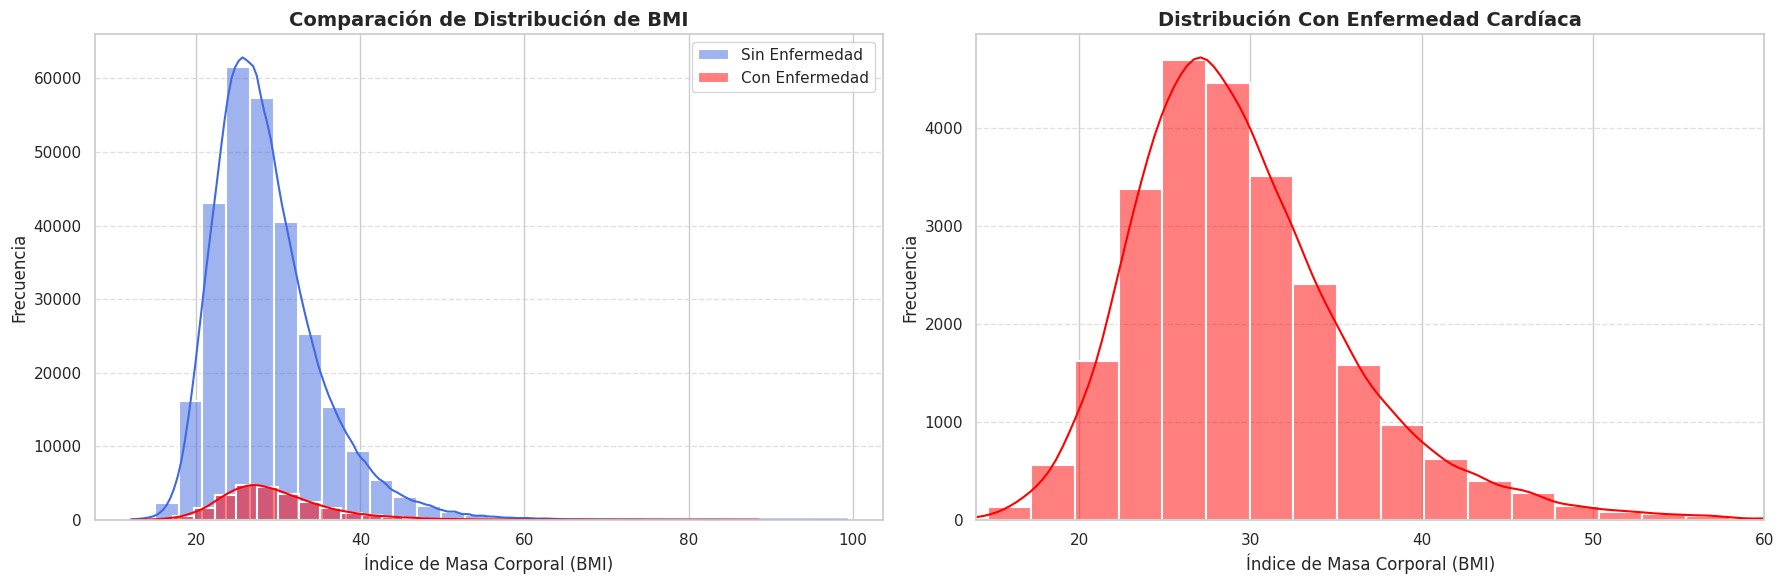

In [ ]:
df_sel_CyN= data[['BMI', 'Heart_Disease']] #datos filtrados
# Crear figura con dos gráficos, el segundo más grande
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(df_sel_CyN[df_sel_CyN["Heart_Disease"] == "No"]["BMI"],bins=30, color="royalblue", kde=True, alpha=0.5, ax=axes[0], linewidth=1.5, label="Sin Enfermedad")
sns.histplot(df_sel_CyN[df_sel_CyN["Heart_Disease"] == "Yes"]["BMI"],bins=30, kde=True, alpha=0.5, color="red", ax=axes[0], linewidth=1.5, label="Con Enfermedad")
axes[0].set_title("Comparación de Distribución de BMI", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Índice de Masa Corporal (BMI)", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].grid(axis='y', linestyle="--", alpha=0.6)
axes[0].legend()
sns.histplot(df_sel_CyN[df_sel_CyN["Heart_Disease"] == "Yes"]["BMI"],bins=30, kde=True, alpha=0.5, color="red", ax=axes[1], linewidth=1.5)#grafico con yes
axes[1].set_title("Distribución Con Enfermedad Cardíaca", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Índice de Masa Corporal (BMI)", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)
axes[1].grid(axis='y', linestyle="--", alpha=0.6)
axes[1].set_xlim(14, 60)  # Ajustar zoom al rango más relevante de BMI
plt.tight_layout()
plt.show()

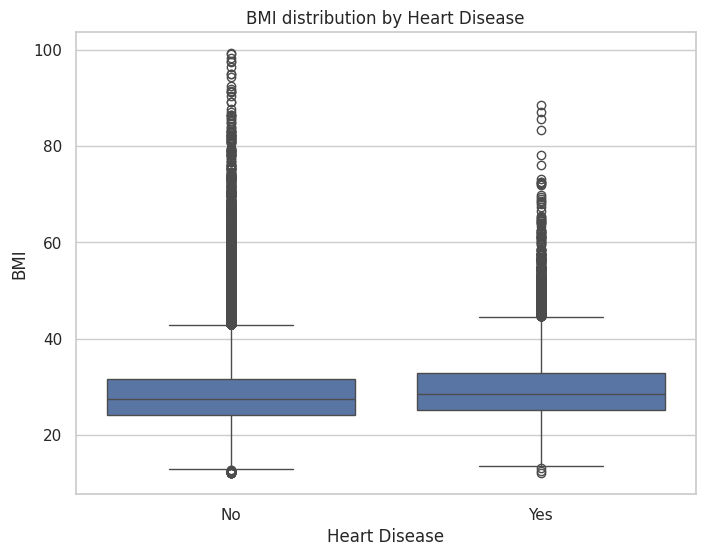

In [ ]:
# Visualize the relationship using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Disease', y='BMI', data=data)
plt.title('BMI distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

**Preparacion de los datos**

La preparación de los datos es un paso fundamental en el análisis y modelado de información. Este proceso consiste en limpiar, transformar y estructurar los datos para que puedan ser utilizados. entre el proceso se encuentra la eliminación de valores nulos, codificación de variables categóricas, normalización o estandarización de variables numéricas, y el manejo de desequilibrios en la distribución de clases. con ello se logra una mejora en la calidad de los datos, optimiza el rendimiento del modelo y reduce el riesgo de sesgos o errores en las predicciones.

La base de datos contiene una combinación de variables categóricas y numéricas. Las variables categóricas están representadas por palabras o etiquetas, mientras que las numéricas contienen valores cuantitativos. Dado que los modelos de machine learning trabajan principalmente con datos numéricos, será necesario transformar las variables categóricas en un formato adecuado antes de su procesamiento.

In [ ]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


***LIMPIEZA DE LOS DATOS**

Se identifica la exitencia de los datos, como es el nombre de la columna y como los  identifica el procesador. en este caso los clasifica como objetos y numeros tipo flotantes

In [ ]:
# Información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(k

Esto permite trabajar sobre un DataFrame modificable sin necesidad de cargar repetidamente la base de datos desde su origen.

Se implementa la eliminación de datos duplicados para evitar redundancias y asegurar que cada registro sea único, eliminando aquellos que contengan la misma información.  Por otro lado, no se aplicó dropna, ya que, como se observó previamente, no existen valores nulos en los datos.

Además, se modificaron los valores de la variable de respuesta relacionada con la diabetes, eliminando la categoría correspondiente a la diabetes gestacional. Esto se debe a que, aunque esta condición puede aumentar el riesgo de desarrollar diabetes en el futuro, no se trata de una enfermedad continua en el tiempo.

Esta depuración de datos es clave, ya que la diabetes, especialmente en sus formas crónicas, está estrechamente relacionada con el desarrollo de cardiopatías. La presencia de diabetes puede aumentar significativamente el riesgo de enfermedades cardiovasculares, lo que hace fundamental un análisis preciso y estructurado de los datos para comprender mejor esta relación y su impacto en la salud.

In [ ]:
data['Diabetes'].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [ ]:
#  Preprocesamiento de datos
df=data.copy()
#eliminacion de duplicados
df = df.drop_duplicates()

#eliminacion de respuestas diferentes a si y no
# Definir columnas binarias que deben contener solo "Yes" o "No"
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                  'Diabetes', 'Arthritis', 'Exercise']

valores_permitidos = ['Yes', 'No','No, pre-diabetes or borderline diabetes']
df_filtrado = df[df['Diabetes'].isin(valores_permitidos)]


# Mostrar estadísticas descriptivas generales
print("\nEstadísticas descriptivas:")
print(df.describe())
print(df.describe(include='object'))


Estadísticas descriptivas:
         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308774.000000  308774.000000  308774.000000        308774.000000   
mean      170.615220      83.590399      28.626813             5.097557   
std        10.658452      21.344664       6.522810             8.200434   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308774.000000                 308774.000000   
mean           29.834290                     15.109517   
std            24.877812                     14.926912   
min             0.000000                      0.000000   
25%   

Las estadísticas descriptivas muestran que la base de datos contiene una combinación de variables numéricas y categóricas. En las variables numéricas, se observa una amplia dispersión en el peso y el BMI, con valores máximos elevados que podrían indicar la presencia de outliers. El consumo de alcohol, frutas, vegetales y papas fritas también presenta una alta variabilidad. En cuanto a las variables categóricas, la mayoría de los individuos reportan buena salud general, chequeos médicos recientes y ausencia de enfermedades como cáncer o cardiopatías. Sin embargo, hay una notable presencia de depresión, diabetes y artritis, lo que sugiere posibles relaciones con otras condiciones de salud.

En general, aunque la base de datos incluye información relevante sobre factores de riesgo asociados a las cardiopatías, también permite realizar análisis más amplios sobre el impacto de distintos hábitos y condiciones en la salud general.

Al filtar los datos se hace una reduccion del datos en 1520 registros. igualemente mantiene la tendencia del sesgo a no subrir una cardiopatia.

In [ ]:
f=data.size-df.size
print(f)
print(df_filtrado.describe(include='object'))
print(df_filtrado.describe())


1520
       General_Health               Checkup Exercise Heart_Disease  \
count          306128                306128   306128        306128   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           109368                237325   237245        281253   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       306128       306128     306128   306128    306128  306128   
unique           2            2          2        3         2       2   
top             No           No         No       No        No  Female   
freq        276296       276420     245001   259062    205779  157515   

       Age_Category Smoking_History  
count        306128          306128  
unique           13               2  
top           65-69              No  
freq          33273          181871  
         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  306128

Se eliminan datos que no tienen una influencia significativa en la determinación del riesgo de cardiopatía, priorizando aquellas variables más relevantes para el análisis. Variables como Checkup, Skin Cancer, Other Cancer y Arthritis fueron descartadas, ya que no presentan una relación directa con enfermedades cardiovasculares según estudios previos.

En contraste, se conservaron factores clave como Ejercicio, Diabetes, Tabaquismo, Consumo de Alcohol y BMI, ya que están fuertemente asociados con el desarrollo de enfermedades del corazón (Khera et al., 2016).

Referencia:
Khera, A. V., et al. (2016). "Genetic Risk, Adherence to a Healthy Lifestyle, and Coronary Disease." New England Journal of Medicine, 375(24), 2349-2358.

In [ ]:
X = df_filtrado.drop(columns=['Heart_Disease', 'Checkup', 'Skin_Cancer','Other_Cancer', 'Arthritis'])
X1= X.copy()
y = df_filtrado['Heart_Disease']

se determina que la respuesta NO, pre-diabetes or borderline diabetes se puede determinar como una yes, en base de informacion de que la persona presente sintomas de diabetes pude determinarse como una gran probabilidad que la persona tenga la enfermedad, si esta no fue diagnosticada. la pre-diabetes sin los cuidados puede a tender a ser una diabetes mas si esta en los limites a este diagnostico.

In [ ]:
X['Diabetes'] = X['Diabetes'].replace({"No, pre-diabetes or borderline diabetes":'Yes',})

In [ ]:
labels = ['Peso bajo', 'Peso normal', 'Sobrepeso', 'Obesidad', 'obesidad grave']
X['BMI'] = pd.cut(X['BMI'], bins=[0, 18.5, 24.9, 29.9, 30, 40], labels=labels, right=True)

In [ ]:
X['BMI'].value_counts()

,count
BMI,
Sobrepeso,109058
Peso normal,86989
obesidad grave,85960
Peso bajo,4512
Obesidad,2168


In [ ]:
X['BMI'] = X['BMI'].astype('category')

CAl reorganizar las variables y cambiar la forma en que se miden las características físicas, se generan tanto ventajas como desventajas en el modelo. Es decir, ste cambio influye en la capacidad del modelo para capturar patrones más detallados, pero también puede hacer que sea más robusto al reducir el impacto de valores extremos.

Precisión en los datos: Antes, al usar valores numéricos, el modelo podía captar pequeñas diferencias entre individuos, ofreciendo una visión más detallada. Ahora, con categorías más amplias, esas diferencias pueden perderse un poco.

Cambio en el enfoque del modelo: Antes, la variable permitía modelos más precisos en la predicción, pero ahora el análisis se orienta más hacia la clasificación. Esto puede afectar la forma en que se interpretan los resultados y el tipo de algoritmo más adecuado.

**Codificacion de la variable a target**

Aquí se define qué variable tomará los valores **1** y **0**, ajustándose a la variable objetivo y estableciendo un modelo de salida binaria. Esto afecta la forma en que se entrena y evalúa el modelo, por lo que es clave preparar bien los datos para evitar sesgos y garantizar una clasificación precisa. Además, la elección del algoritmo adecuado será fundamental, ya que algunos manejan mejor este tipo de problemas que otros.


In [ ]:
y = y.replace({"Yes": 1,"No": 0})
y = y.astype(int)
print(y.value_counts())

Heart_Disease
0    281253
1     24875
Name: count, dtype: int64


<ipython-input-24-0a9b94adfe3b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"Yes": 1,"No": 0})


Para que los modelos de aprendizaje automático puedan procesar correctamente los datos, es necesario convertir las variables categóricas en valores numéricos. Label Encoding es una opción eficiente, ya que asigna un número único a cada categoría, facilitando el procesamiento sin aumentar la dimensionalidad de los datos.

Sin embargo, se debe tener en cuanta que esta técnica puede hacer que el modelo interprete erróneamente una relación ordinal entre categorías. Por ello, se puede aplicar el One-Hot Encoding ya que representa cada categoría como una variable binaria, evitando posibles sesgos en el análisis, que seria un paso a seguir. en base al misma base

In [ ]:
# Identificar tipos de columnas
categorical_cols = X.select_dtypes(include=['object','category']).columns  # Columnas categóricas
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns  # Columnas numéricas

# Convertir variables categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convierte a números
    label_encoders[col] = le

# Guardar dataset procesado
#df_filtrado.to_csv("CVD_cleaned_processed.csv", index=False)
#print("Datos categóricos convertidos y datos numéricos estandarizados. Guardado en 'CVD_cleaned_processed.csv'")



In [ ]:
X

,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,0,0,0,0,10,150.0,32.66,1,1,0.0,30.0,16.0,12.0
1,4,0,0,1,0,10,165.0,77.11,3,0,0.0,30.0,0.0,4.0
2,4,1,0,1,0,8,163.0,88.45,4,0,4.0,12.0,3.0,16.0
3,3,1,0,1,1,11,180.0,93.44,3,0,0.0,30.0,30.0,8.0
4,2,0,0,0,1,12,191.0,88.45,2,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,2,1,0,0,1,7,168.0,58.97,2,0,0.0,16.0,12.0,0.0
308849,4,1,0,0,1,1,168.0,81.65,3,0,4.0,30.0,8.0,0.0
308850,1,1,0,1,1,9,180.0,69.85,2,0,8.0,15.0,60.0,4.0
308852,4,1,0,0,1,9,183.0,79.38,2,0,3.0,30.0,12.0,0.0


In [ ]:
# Aplicar Label Encoding a columnas categóricas de pocas categorías
label_encoders = {}
for col1 in categorical_cols:
    if X[col1].nunique() <= 2:  # Si solo tiene 2 valores únicos, usar Label Encoding
        le = LabelEncoder()
        X[col1] = le.fit_transform(X[col1])
        label_encoders[col1] = le
# Aplicar One-Hot Encoding a columnas con más de 2 categorías
X1 = pd.get_dummies(X, columns=[col1 for col1 in categorical_cols if col1 not in label_encoders])

# Mostrar las primeras filas del dataframe transformado
X1.head()

,Exercise,Depression,Diabetes,Sex,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,...,Age_Category_9,Age_Category_10,Age_Category_11,Age_Category_12,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4,BMI_5
0,0,0,0,0,150.0,32.66,1,0.0,30.0,16.0,...,False,True,False,False,False,True,False,False,False,False
1,0,0,1,0,165.0,77.11,0,0.0,30.0,0.0,...,False,True,False,False,False,False,False,True,False,False
2,1,0,1,0,163.0,88.45,0,4.0,12.0,3.0,...,False,False,False,False,False,False,False,False,True,False
3,1,0,1,1,180.0,93.44,0,0.0,30.0,30.0,...,False,False,True,False,False,False,False,True,False,False
4,0,0,0,1,191.0,88.45,1,0.0,8.0,4.0,...,False,False,False,True,False,False,True,False,False,False


Se utiliza una tecnica para equilibar los datos hay que tener encuenta que se guardara en un campo diferente para comparacion en los modelos mas adelante.

nombre y detalles

SMOTE (Synthetic Minority Over-sampling Technique) es una técnica de sobremuestreo utilizada para equilibrar clases en conjuntos de datos desbalanceados, especialmente útil en problemas de clasificación binaria donde una clase es mucho menos frecuente que la otra.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
y1=y.copy()
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

# Verificar la distribución de clases después del balanceo
print("Distribución antes de SMOTE:", Counter(y))
print("Distribución después de SMOTE:", Counter(y1_resampled))

Distribución antes de SMOTE: Counter({0: 281253, 1: 24875})
Distribución después de SMOTE: Counter({0: 281253, 1: 281253})


In [ ]:
# Guardar dataset procesado
# Unir X e y en un solo DataFrame
df_final = pd.concat([X, y], axis=1)

# Guardar en un archivo CSV
df_final.to_csv("/content/drive/My Drive/datos_procesados.csv", index=False)

print("Archivo guardado exitosamente.")



Archivo guardado exitosamente.


In [ ]:
#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
# Inicializar y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
yp_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, yp_pred)
report = classification_report(y_test, yp_pred)

# Mostrar resultados
print(f"Precisión del modelo: {accuracy:.4f}")
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.9199
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56321
           1       0.50      0.06      0.10      4905

    accuracy                           0.92     61226
   macro avg       0.71      0.53      0.53     61226
weighted avg       0.89      0.92      0.89     61226



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


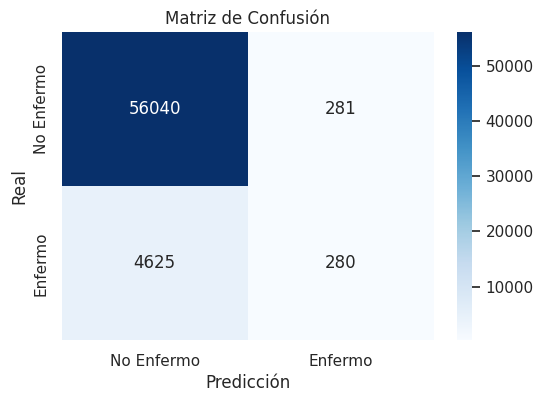

In [31]:
matriz_confusion = confusion_matrix(y_test, yp_pred)

#Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()